# Explore the data

https://insights.stackoverflow.com/survey


## Download the data


In [341]:
import urllib.request
import zipfile
import pandas as pd

url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zip_file_object = zipfile.ZipFile(filehandle, 'r')
file = zip_file_object.open('survey_results_public.csv')

survey_data = pd.read_csv(file)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

survey_data.tail(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,"Developer, full-stack;Developer, desktop or en...",20 to 99 employees,I have a great deal of influence,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,NaN,NaN,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Managed Hosting;Microsoft Azure;VMware,Firebase;Linode;Managed Hosting;Microsoft Azur...,ASP.NET;React.js,ASP.NET;ASP.NET Core ;Blazor;Laravel;Next.js;R...,.NET;Pandas;React Native,.NET;Cordova;Ionic;Pandas;React Native;Xamarin,npm,npm;Unreal Engine,Spyder;Visual Studio;Visual Studio Code,Spyder;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Microsoft Lists,Microsoft Lists,Microsoft Teams;Zoom,Microsoft Teams;Zoom,Very unfavorable,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,"Yes, somewhat",55-64 years old,Man,No,Straight / Heterosexual,Multiracial,None of the above,None of the above,Yes,Independent contributor,42.00000,Disagree,Neither agree nor disagree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Never,Never,Never,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,31,"Developer, front-end;Developer, desktop or ent...",10 to 19 employees,I have a great deal of influence,Start a free trial;Visit developer communities...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,58500.00000,Yearly,C#;Delphi;VBA,Delphi,Microsoft SQL Server;MongoDB;Oracle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RAD Studio (Delphi, C++ Builder);Visual Studio","RAD Studio (Delphi, C++ Builder);Visual Studio",Windows,Windows,SVN,Dedicated version control GUI application,NaN,NaN,NaN,NaN,Zoom,Zoom,Indifferent,Stack Overflow,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,"No, not at all",55-64 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
73267,73268,"I used to be a developer by profession, b

## Clean the data

In [342]:
label = "ConvertedCompYearly"

# Drop rows with no data
survey_data = survey_data.dropna(subset = [label])

# Drop rows with extreme outliers
survey_data = survey_data.drop(survey_data[survey_data[label] > 400000].index)

# Check if the numbers look reasonable
survey_data[[label]].describe()

,ConvertedCompYearly
count,36260.00000
mean,80720.59956
std,65852.55164
min,1.00000
25%,33888.75000
50%,63986.00000
75%,110000.00000
max,400000.00000


## Clean more columns

In [343]:
numeric_features = ['YearsCode', 'YearsCodePro']

for col_name in numeric_features:
    survey_data[col_name] = pd.to_numeric(survey_data[col_name], errors='coerce')
    survey_data = survey_data.dropna(subset = [col_name])  

survey_data[numeric_features].describe()

,YearsCode,YearsCodePro
count,34685.00000,34685.00000
mean,14.65435,9.84965
std,9.39327,8.06248
min,1.00000,1.00000
25%,8.00000,4.00000
50%,12.00000,7.00000
75%,20.00000,14.00000
max,50.00000,50.00000


## Visualize the label column

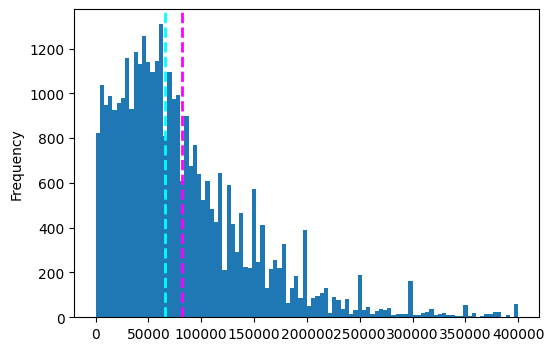

In [344]:
import matplotlib.pyplot as plt

label_data = survey_data[label]
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
ax.hist(label_data, bins=100)
ax.set_ylabel('Frequency')
ax.axvline(label_data.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label_data.median(), color='cyan', linestyle='dashed', linewidth=2)

## Visualize the feature columns

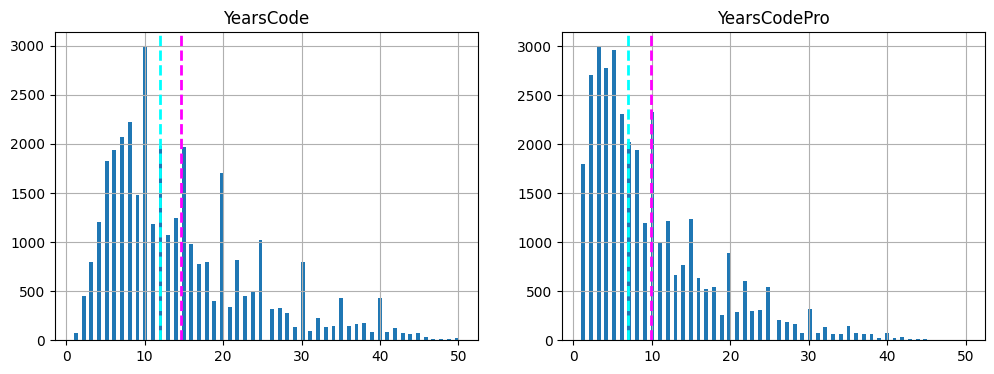

In [345]:
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(12, 4))

for ind, col_name in enumerate(numeric_features):
    feature = survey_data[col_name]
    axis = axes[ind]
    feature.hist(bins=100, ax = axis)
    axis.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    axis.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    axis.set_title(col_name)

## Categorical features

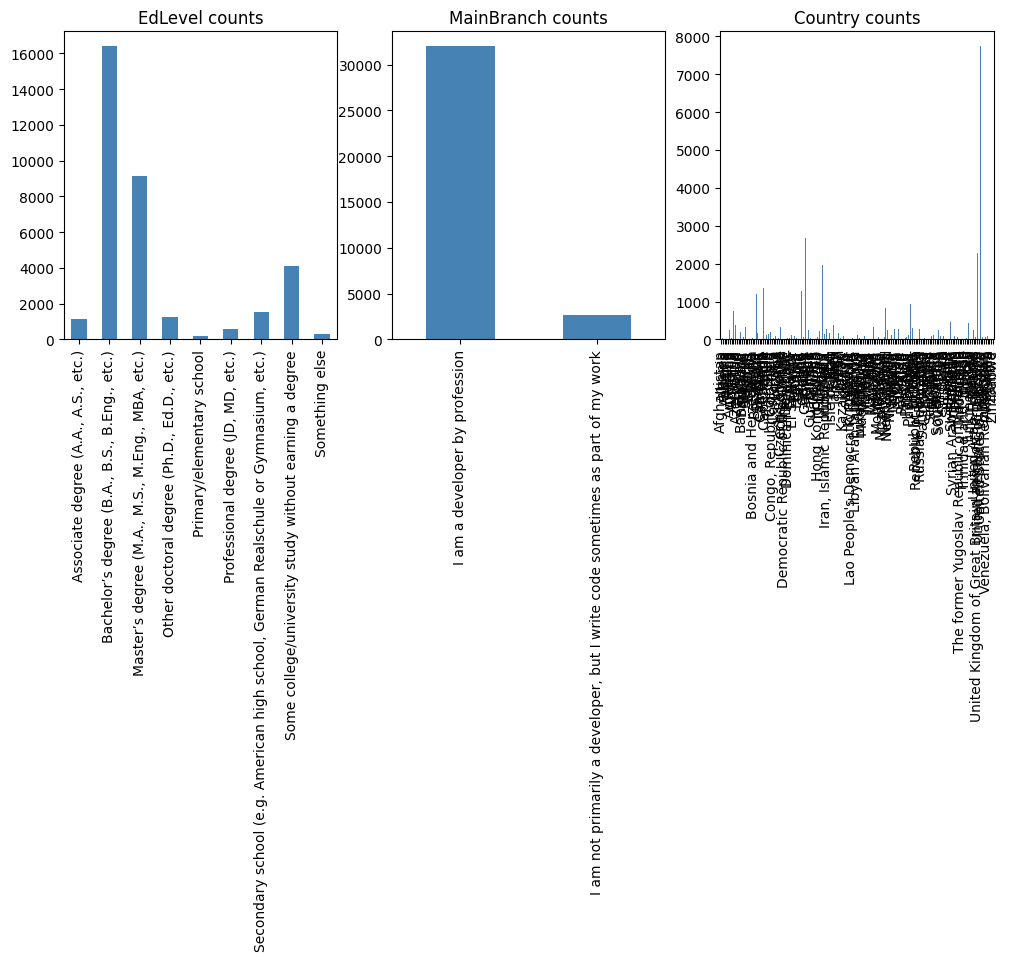

In [346]:
categorical_features = ['EdLevel', 'MainBranch', 'Country']

fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(12, 4))

for ind, col_name in enumerate(categorical_features):
    counts = survey_data[col_name].value_counts().sort_index()
    axis = axes[ind]
    counts.plot.bar(ax=axis, color='steelblue')
    axis.set_title(col_name + ' counts')

## Measure correlations

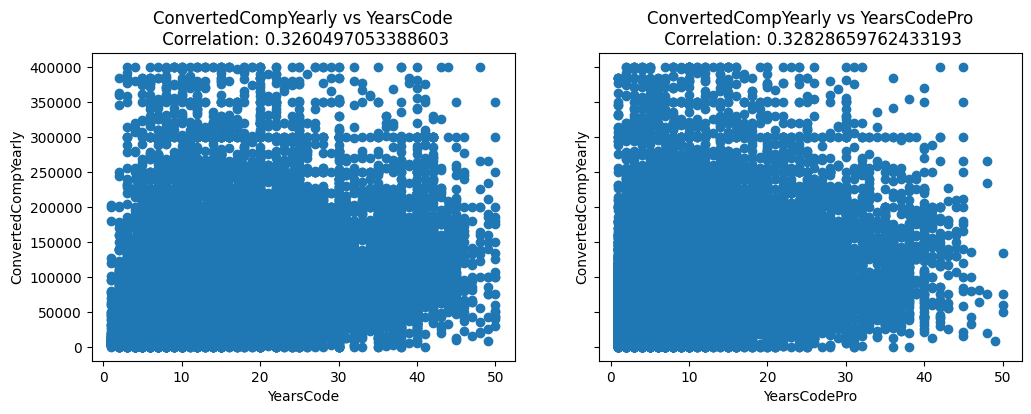

In [347]:
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(12, 4), sharey=True)

for ind, feature in enumerate(numeric_features):
    label_data = survey_data[label]
    feature_data = survey_data[feature]
    correlation = feature_data.corr(label_data)
    axis = axes[ind]
    axis.scatter(x=feature_data, y=label_data)
    axis.set_xlabel(feature)
    axis.set_ylabel(label)
    axis.set_title(f'{label} vs {feature}\n Correlation: {correlation}')


# Build a model

## Separate test and train data

In [348]:
# Separate features and labels
X = survey_data[numeric_features].values
y = survey_data[label].values
print('Features:', X[:5], '\nLabels:', y[:5], sep='\n')

Features:
[[14.  5.]
 [20. 17.]
 [ 6.  6.]
 [ 5.  2.]
 [12. 10.]]

Labels:
[ 40205. 215232.  49056.  60307. 194400.]


In [349]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f'Training Set: {X_train.shape[0]} rows\n    Test Set: {X_test.shape[0]} rows')

Training Set: 24279 rows
    Test Set: 10406 rows


## Train the model

In [350]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[1217.86632664 1368.82985741]
50980.5258471729


## Evaluate model on test data

In [351]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:8])
print('Actual labels   : ', y_test[:8])

Predicted labels:  [83853. 61176. 72590. 59958. 78679. 65897. 67266. 65897.]
Actual labels   :  [47350. 51763. 13212.    50. 38392.  3864. 14952. 58654.]


## Visualize the predictions

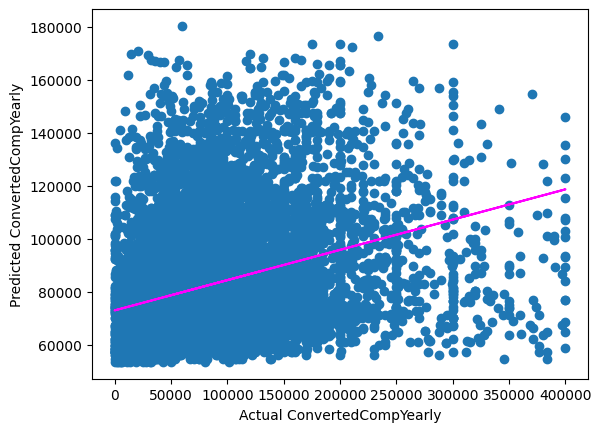

In [352]:
plt.scatter(y_test, predictions)
plt.xlabel(f'Actual {label}')
plt.ylabel(f'Predicted {label}')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

## Calculate evaluation metrics

In [353]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print(" MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("  R2:", r2) # TODO: be able to explain better. residuals squared. higher is better.

 MSE: 3842062015.322757
RMSE: 61984.36912095465
  R2: 0.11560901481494401


# Experiment with more models

* **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an Ordinary Least Squares algorithm), but other variants such as Lasso and Ridge.
* **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.
* **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Generalize the evaluation process

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561


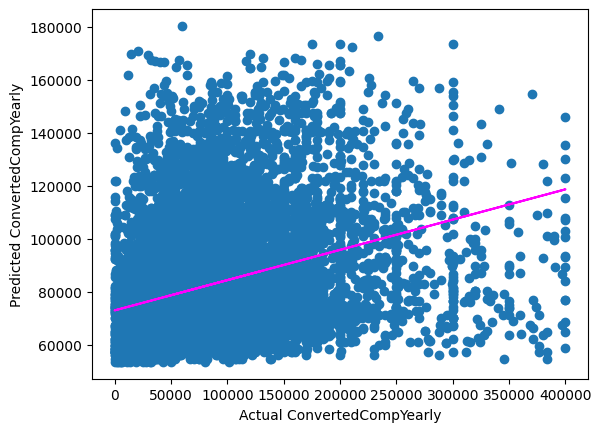

In [354]:
eval_results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2'])

def evaluate_model():
    # Evaluate the model using the test data
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    eval_results.loc[len(eval_results.index)] = [str(model), mse, rmse, r2]
    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    # Overlay the regression line
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')

evaluate_model()
eval_results

## Lasso (linear regression)

Lasso works well when only a few features predict the label.

https://scikit-learn.org/stable/modules/linear_model.html#lasso

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561


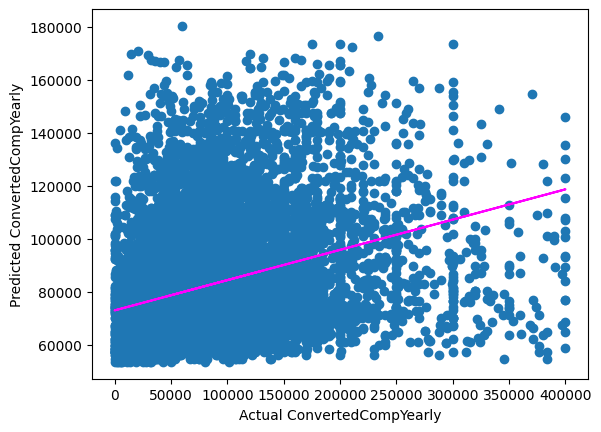

In [355]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)

evaluate_model()
eval_results

## Decision tree

Decision trees can be used for both regression and classification problems.

https://scikit-learn.org/stable/modules/tree.html#

In [356]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)

# Visualize the model tree
tree = export_text(model)
print(tree)
# TODO: graphviz trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

|--- feature_1 <= 5.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_0 <= 5.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [37270.89]
|   |   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |   |--- value: [36898.44]
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |   |   |   |--- value: [35367.96]
|   |   |   |   |   |   |   |--- feature_0 >  3.50
|   |   |   |   |   |   |   |   |--- value: [33697.34]
|   |   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |   |--- value: [40808.42]
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [11964.00]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   | 

## Decision tree (evaluation)

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561
2,DecisionTreeRegressor(),3951327783.02064,62859.58784,0.09046


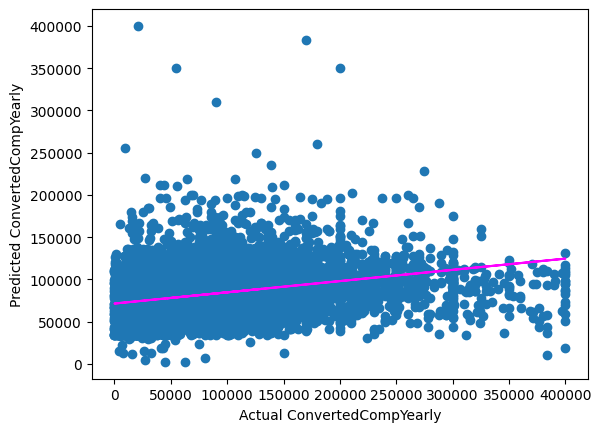

In [357]:
evaluate_model()
eval_results

## Random forest (ensemble)

Applies an averaging function to multiple Decision Tree models for a better overall model
https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561
2,DecisionTreeRegressor(),3951327783.02064,62859.58784,0.09046
3,RandomForestRegressor(),3903089596.03082,62474.71165,0.10156


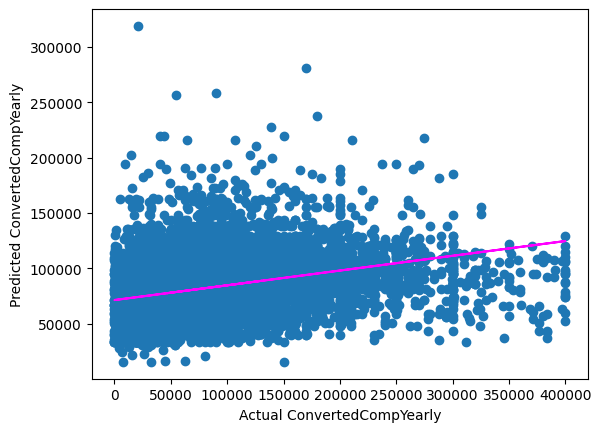

In [358]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)

evaluate_model()
eval_results

## Gradient tree boosting

https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561
2,DecisionTreeRegressor(),3951327783.02064,62859.58784,0.09046
3,RandomForestRegressor(),3903089596.03082,62474.71165,0.10156
4,GradientBoostingRegressor(),3756363800.22343,61289.18176,0.13534


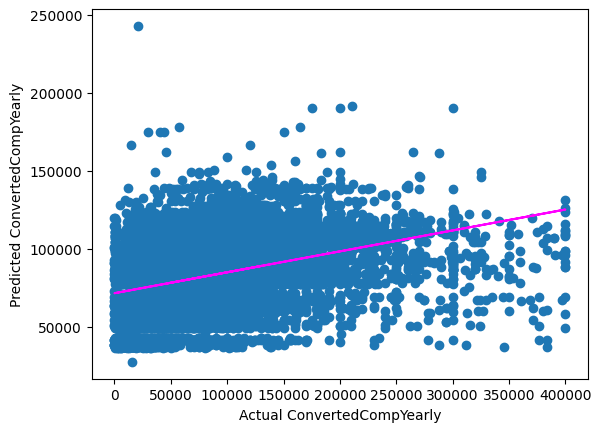

In [359]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)

evaluate_model()
eval_results

## Improve model

* Tune hyperparameters
* Preprocess data

https://learn.microsoft.com/en-us/training/modules/train-evaluate-regression-models/6-improve-models
    

## Tune hyperparameters

In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model = gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 



## Evaluate tuned model

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561
2,DecisionTreeRegressor(),3951327783.02064,62859.58784,0.09046
3,RandomForestRegressor(),3903089596.03082,62474.71165,0.10156
4,GradientBoostingRegressor(),3756363800.22343,61289.18176,0.13534
5,GradientBoostingRegressor(n_estimators=50),3750522122.07579,61241.50653,0.13668


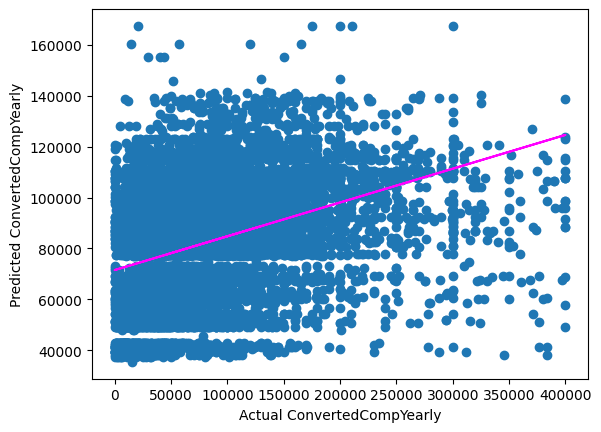

In [361]:
evaluate_model()
eval_results

## Pre-processing pipeline

In [362]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features and labels
X = survey_data[numeric_features + categorical_features].values
y = survey_data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Define preprocessing for numeric columns (scale them)
numeric_features_indices = [0, 1]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features_indices = [2, 3, 4]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_indices),
        ('cat', categorical_transformer, categorical_features_indices)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))

## Evaluate tuned model

,Model,MSE,RMSE,R2
0,LinearRegression(),3842062015.32276,61984.36912,0.11561
1,Lasso(),3842063570.78394,61984.38167,0.11561
2,DecisionTreeRegressor(),3951327783.02064,62859.58784,0.09046
3,RandomForestRegressor(),3903089596.03082,62474.71165,0.10156
4,GradientBoostingRegressor(),3756363800.22343,61289.18176,0.13534
5,GradientBoostingRegressor(n_estimators=50),3750522122.07579,61241.50653,0.13668
6,"Pipeline(steps=[('preprocessor',\n ...",2316331269.93058,48128.27932,0.46681


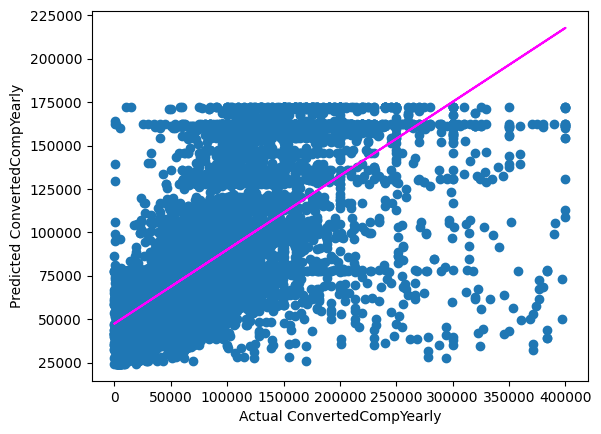

In [363]:
evaluate_model() # TODO: why the cap
eval_results

## Store the model

In [364]:
import joblib
import pickle

# Save the model as a pickle file
filename = './function/yearly-comp.pkl'
joblib.dump(model, filename)

['./function/yearly-comp.pkl']

## Use the stored model

In [368]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[25, 15, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','I am a developer by profession', 'United States of America']])
print(f'New sample: {X_new[0]}')

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print(f'Prediction: {np.round(result[0])}')

New sample: ['25' '15' 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'I am a developer by profession' 'United States of America']
Prediction: 171994.0


In [378]:
enums_lines = []

for feature in categorical_features:
    enums_lines.append(f'class {feature}(str, Enum):')
    for ind, value in enumerate(survey_data[feature].unique()):
        enum_name = f'{feature.upper()}_{ind}'
        enums_lines.append(f'    {enum_name} = "{value}"')
    enums_lines.append('\n')

enums_module = 'from enum import Enum\n\n'  + '\n'.join(enums_lines)
f = open("function/categories.py", "w")
f.write(enums_module)
f.close()